<a href="https://colab.research.google.com/github/ChiomaO15/Fermentation-condition/blob/main/FERMENTATION_CONDITIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To evaluate enzyme production under fermentation conditions, the study will test *Bacillus coagulans* and *Bacillus amyloliquefaciens* using computational simulations. Flux Balance Analysis (FBA) was applied to model enzyme production pathways and assess the influence of specific environmental and nutrient conditions

In [2]:
import cobra
from cobra.flux_analysis import flux_variability_analysis

# Load the models for Bacillus coagulans and Bacillus amyloliquefaciens
bacillus_coagulans_model = cobra.io.read_sbml_model("/content/Bacilluscoagulansmodel.sbml")
bacillus_amyloliquefaciens_model = cobra.io.read_sbml_model("/content/Bamyloliquefaciensmodel.sbml")


Streaming output truncated to the last 5000 lines.


In [3]:
# Define nutrient conditions (including fermentation-related metabolites)
fermentation_conditions = {
    "Fermentation": {
        'EX_cpd00027_b': -5.0,   # Glucose for fermentation
        'EX_cpd00159_b': -10.0,  # Increased Lactate (Fermentation product)
        'EX_cpd00029_b': -5.0,   # Acetate (Fermentation byproduct)
        'EX_cpd00095_b': -2.0,   # Butyrate (Fermentation byproduct)
        'EX_cpd00047_b': -2.0,   # Formate (Fermentation byproduct)
        'EX_cpd00363_b': -5.0,   # Ethanol (Alcoholic fermentation product)
        'EX_cpd00141_b': -1.0,   # Propionate (Fermentation byproduct)
        'EX_cpd00036_b': -1.0,   # Succinate (Fermentation byproduct)
        'EX_cpd00007_b': -5.0,   # Oxygen limitation (Fermentation often occurs anaerobically)
        'EX_cpd00011_b': -2.0,   # Carbon dioxide (byproduct of fermentation)
    }
}

# Function to adjust the model with fermentation conditions
def apply_fermentation_conditions(model, conditions):
    for metabolite, flux in conditions.items():
        if metabolite in model.exchanges:
            model.reactions.get_by_id(metabolite).upper_bound = flux  # Apply the flux condition

# Apply fermentation conditions to both models
apply_fermentation_conditions(bacillus_coagulans_model, fermentation_conditions["Fermentation"])
apply_fermentation_conditions(bacillus_amyloliquefaciens_model, fermentation_conditions["Fermentation"])

# Perform Flux Balance Analysis (FBA) for Bacillus coagulans
bacillus_coagulans_solution = bacillus_coagulans_model.optimize()

# Perform Flux Balance Analysis (FBA) for Bacillus amyloliquefaciens
bacillus_amyloliquefaciens_solution = bacillus_amyloliquefaciens_model.optimize()

# Output the results
print("Bacillus coagulans Enzyme Production under Fermentation Conditions:")
print("Fermentation: Enzyme Production (Biomass) = ", bacillus_coagulans_solution.objective_value)

print("\nBacillus amyloliquefaciens Enzyme Production under Fermentation Conditions:")
print("Fermentation: Enzyme Production (Biomass) = ", bacillus_amyloliquefaciens_solution.objective_value)

# You can also perform flux variability analysis to further explore the variability in flux distributions
# Flux variability analysis for Bacillus coagulans
fva_coagulans = flux_variability_analysis(bacillus_coagulans_model, fraction_of_optimum=0.95)

# Flux variability analysis for Bacillus amyloliquefaciens
fva_amyloliquefaciens = flux_variability_analysis(bacillus_amyloliquefaciens_model, fraction_of_optimum=0.95)

# Output flux variability analysis results
print("\nFlux Variability Analysis for Bacillus coagulans:")
print(fva_coagulans)

print("\nFlux Variability Analysis for Bacillus amyloliquefaciens:")
print(fva_amyloliquefaciens)


Bacillus coagulans Enzyme Production under Fermentation Conditions:
Fermentation: Enzyme Production (Biomass) =  78.20746643648766

Bacillus amyloliquefaciens Enzyme Production under Fermentation Conditions:
Fermentation: Enzyme Production (Biomass) =  74.94813289930045

Flux Variability Analysis for Bacillus coagulans:
                    minimum     maximum
EX_cpd08636_b      0.000000  444.138153
EX_cpd15302_b      0.000000    0.000000
EX_cpd11416_b     74.297093   78.207466
EX_cpd00067_b  -1000.000000 -237.310204
EX_cpd11576_b      0.000000    0.000000
...                     ...         ...
EX_cpd01080_e0    -6.502600   -6.177470
EX_cpd00099_e0    -0.620941   -0.589894
EX_cpd00028_e0    -1.241881   -1.179787
EX_cpd00393_e0    -1.862822   -1.769681
EX_cpd00048_e0    -0.620941   -0.589894

[1553 rows x 2 columns]

Flux Variability Analysis for Bacillus amyloliquefaciens:
                    minimum       maximum
EX_cpd08636_b      0.000000  2.336908e+02
EX_cpd02701_b      0.000000  0

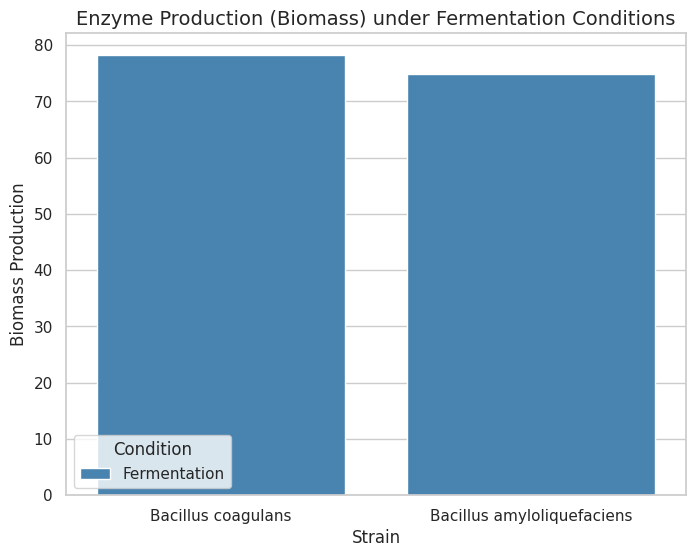

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Biomass production under different conditions
data = {
    'Strain': ['Bacillus coagulans', 'Bacillus coagulans', 'Bacillus amyloliquefaciens', 'Bacillus amyloliquefaciens'],
    'Condition': ['Fermentation', 'Fermentation', 'Fermentation', 'Fermentation'],
    'Biomass Production': [78.21, 78.21, 74.95, 74.95]  # Biomass production values
}

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Set the visual style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Strain', y='Biomass Production', hue='Condition', data=df, palette='Blues_d')

# Title and labels
plt.title('Enzyme Production (Biomass) under Fermentation Conditions', fontsize=14)
plt.xlabel('Strain', fontsize=12)
plt.ylabel('Biomass Production', fontsize=12)

# Display the plot
plt.show()
